In [1]:
import simulation as sk
import visualization as vs
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
import correlated_random as cr
from scipy.optimize.minpack import curve_fit

In [2]:
def func(x,b):
    return np.exp(-x/b)

In [3]:
def verlet_simulation(step, steps, sigma, epsilon, mass, temp, desired_temp, box_size, relax_steps):
    dm_time = step * (epsilon/(mass*sigma**2))**(1/2)
    square = sk.fcc_lattice(2,2,2,1)
    vels = sk.init_velocity(len(square), temp, mass)
    return sk.vervlet_evolution(pos=square, 
                                vel=vels, 
                                time_step=dm_time, 
                                steps=steps, 
                                mass=mass, 
                                sigma=sigma, 
                                epsilon=epsilon, 
                                size=box_size, 
                                temp=temp,
                                relaxation_steps=relax_steps, 
                                desired_temp=desired_temp)

In [11]:
sigma, epsilon, mass = sk.argon_parameters()

size = 2.5
t_step = 1e-15
temp = 6
desired_T = 1.36
steps = 20000
relax_steps = 100

verlet_data, verlet_energy, verlet_obs = verlet_simulation(step=t_step,
                                                           steps=steps,
                                                           sigma=sigma,
                                                           epsilon=epsilon,
                                                           mass=mass,
                                                           temp=temp,
                                                           desired_temp=desired_T,
                                                           box_size=size,
                                                           relax_steps=relax_steps)

Initial temeprature: 6
average_temperature: 591.7460150472509
Rescale velocity: 0.04645486946779809
average_temperature: 142.74486929775054
Rescale velocity: 0.0970663191665468
average_temperature: 63.13070385626139
Rescale velocity: 0.13616715870109644
average_temperature: 28.30646416429789
Rescale velocity: 0.2038594741193461
average_temperature: 14.634063676989886
Rescale velocity: 0.2978622020897082
average_temperature: 8.584547344826849
Rescale velocity: 0.3759371547820104
average_temperature: 5.076005751237065
Rescale velocity: 0.5138664696557911
average_temperature: 3.546111968546203
Rescale velocity: 0.6216768974861712
average_temperature: 2.556842033937038
Rescale velocity: 0.7544215949358349
average_temperature: 2.098756206535671
Rescale velocity: 0.7925214154630528
average_temperature: 1.5628641786734017
Rescale velocity: 0.9231137405777725
average_temperature: 1.4727697814391438
Rescale velocity: 0.9395387840455254
average_temperature: 1.4364558119331632
Rescale velocity: 0

average_temperature: 1.3899621785510168
average_temperature: 1.3874607259849754
average_temperature: 1.3422893765263624
average_temperature: 1.4104912230976172
average_temperature: 1.4078418541560305


In [5]:
kinetic = verlet_energy[0]
potential = verlet_energy[1]
total_energy = kinetic + potential
pressure = verlet_obs[0]
diffusion = verlet_obs[1]

In [5]:
def func(x,a,b,c):
    return a*np.exp(-x/b)+c

def get_tau(autocorrelation):
    x = np.arange(400)
    y = np.nan_to_num(autocorrelation[:400])
    params, errors = curve_fit(func,x, y)
    return params

In [6]:
#Here we generate the random correlated data
#The third parameter is the correlation length tau
#We should recover it from 
toy=cr.normal_autocorr(0,0.5,20,20000)
af_toy = sk.get_autocorrelation_function(toy[10:])

/home/juandaanieel/c/TUDelft/AP_master/semester2/CP/project_1/repository/Project-1_compphys_bot_juandaanieel_kwo/molecular_dynamics_simulation/simulation/observables.py:56: RuntimeWarning: invalid value encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)


In [7]:
params = get_tau(af_toy[1:])
params

array([8.75714822e-03, 5.69614303e+01, 5.08190365e-03])

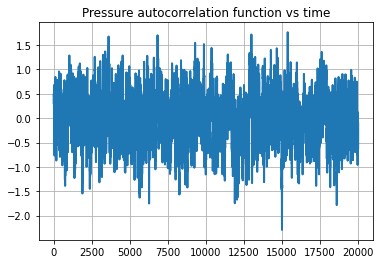

In [9]:
fig = plt.figure()
ax4 = fig.add_subplot()
ax4.errorbar(range(len(toy)), toy, lw=2)
ax4.set_title("Pressure autocorrelation function vs time")
ax4.grid(True)
plt.show()

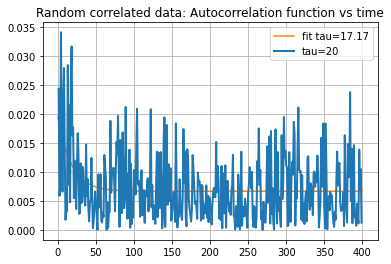

In [14]:
x = np.arange(400)
x1 = np.linspace(0,400,400)
y = func(x,params[0],params[1],params[2])
fig = plt.figure()
ax4 = fig.add_subplot()
ax4.errorbar(x[1:400],af_toy[1:400], lw=2, label="tau=20")
ax4.plot(x1,y,label="fit tau=17.17")
ax4.set_title("Random correlated data: Autocorrelation function vs time")
ax4.grid(True)
ax4.legend()
plt.show()

In [54]:
tau = get_tau(af_pressure)[1]
observable = pressure
N = len(observable)
print(tau)
sigma = np.sqrt(2*tau/N)*np.sqrt(np.mean(observable**2)-np.mean(observable)**2)
print(sigma)

41.47010661978306
0.0005263311634039011


No handles with labels found to put in legend.


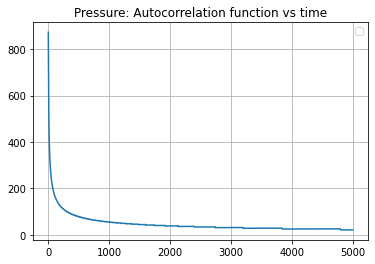

In [57]:
y=np.nan_to_num(af_pressure)
x = np.arange(len(y))
fig = plt.figure()
ax4 = fig.add_subplot()
ax4.plot(x[1:5000],y[1:5000])

ax4.set_title("Pressure: Autocorrelation function vs time")
ax4.grid(True)
ax4.legend()
plt.show()

In [6]:
af_pressure = sk.get_autocorrelation_function(pressure)
af_diffusion = sk.get_autocorrelation_function(diffusion)
error_pressure = sk.get_error_observable(np.nan_to_num(af_pressure[1:]))
error_diffusion = sk.get_error_observable(np.nan_to_num(af_diffusion[1:]))

/home/juandaanieel/c/TUDelft/AP_master/semester2/CP/project_1/repository/Project-1_compphys_bot_juandaanieel_kwo/molecular_dynamics_simulation/simulation/observables.py:94: RuntimeWarning: invalid value encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)


In [39]:
def get_error_observable(observable):
    tau = get_tau(observable)[1]
    N = len(observable)
    sigma = np.sqrt(2*tau/N)*np.sqrt(np.mean(observable**2)-np.mean(observable)**2)
    return sigma

In [9]:
error_diffusion

0.02061670910496343

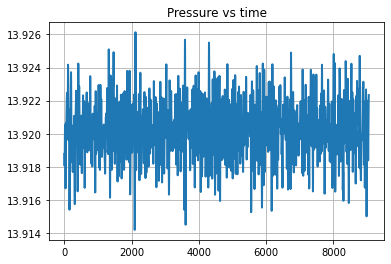

In [7]:
fig = plt.figure()
ax4 = fig.add_subplot()
ax4.errorbar(range(len(pressure)//2), 
             pressure[:len(pressure)//2], 
             yerr=sigma,
             ecolor='red',
             errorevery=1,
             lw=2)
ax4.set_title("Pressure vs time")
ax4.grid(True)
plt.show()

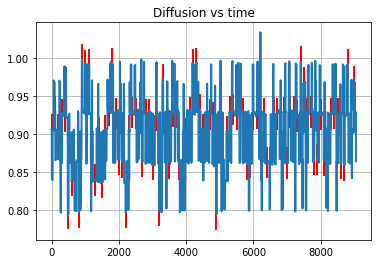

In [10]:
fig = plt.figure()
ax4 = fig.add_subplot()
ax4.errorbar(range(len(diffusion)//2), 
             diffusion[:len(diffusion)//2],
             yerr=error_diffusion,
             ecolor='red',
             errorevery=100,
             lw=2)
ax4.set_title("Diffusion vs time")
ax4.grid(True)
plt.show()

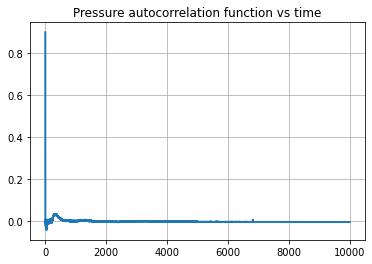

In [185]:
fig = plt.figure()
ax4 = fig.add_subplot()
ax4.errorbar(range(len(af_toy)), af_toy, lw=2)
ax4.set_title("Pressure autocorrelation function vs time")
ax4.grid(True)
plt.show()

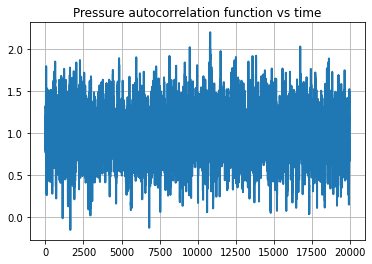

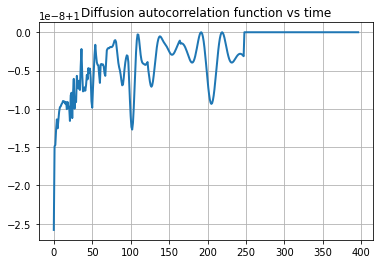

In [189]:
fig = plt.figure()
ax4 = fig.add_subplot()
ax4.errorbar(range(len(af_pressure)-100), af_diffusion[:-100], lw=2)
ax4.set_title("Diffusion autocorrelation function vs time")
ax4.grid(True)
plt.show()

In [30]:
sk.get_tau(toy)

74.65938391588655


74.65938391588655

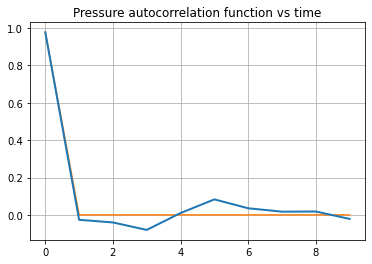

In [41]:
x = np.arange(10)
y = func(x,params[0],params[1],params[2])
fig = plt.figure()
ax4 = fig.add_subplot()
ax4.errorbar(x,af_toy[:10], lw=2)
ax4.plot(x,y)
ax4.set_title("Pressure autocorrelation function vs time")
ax4.grid(True)
plt.show()

<ipython-input-42-0cb0e3ffb343>:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-x/b)+c
/home/juandaanieel/bin/anaconda3/envs/qiskit/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [44]:
params

array([9.77610720e-01, 3.63668971e-02, 2.19934023e-04])